In [2]:
from matplotlib import path as mpath

class OwnErrorMarker(mpath.Path):

    def __init__(self, *args, subtract_mean=True, **kwargs):
        super().__init__(*args, **kwargs)

        if subtract_mean:
            self.vertices = (self.vertices - self.vertices.mean(axis=0))
        self._vertices_orig = self.vertices
        self._scatter_kwargs = dict(facecolors='none',
                                    capstyle='round')

    def reset(self):
        self.vertices = self._vertices_orig

    def top(self, scale=1):
        self.vertices = self._vertices_orig * [scale, scale]
        return self

    def bot(self, scale=1):
        self.vertices = self._vertices_orig * [scale, -scale]
        return self

    def update_scatter_kwargs(self, **scatter_kwargs):
        self._scatter_kwargs.update(**scatter_kwargs)

    def get_scatter_kwargs(self):
        return self._scatter_kwargs

    def add_to_legend(self, ax, label, offset=3, ms=100,
                      rotate=True, scale=1, color='k',
                      do_not_use_label=False):
        loc_vertices = np.concatenate(
            [(self._vertices_orig + [0, offset]) * [scale, scale],
             (self._vertices_orig + [0, offset]) * [scale, -scale]])

        loc_codes = np.concatenate([self.codes, self.codes])

        if rotate:
            loc_vertices = loc_vertices @ [[0, 1], [1, 0]]

        return ax.scatter(np.nan, np.nan, s=ms, edgecolor=color,
                          marker=mpath.Path(loc_vertices, loc_codes),
                          label=None if do_not_use_label else label,
                          **self._scatter_kwargs)


ERROR_MARKERS = {
    "fancy": OwnErrorMarker(
        [[-2, -1], [-1, 1], [1, 1], [2, -1]],
        [mpath.Path.MOVETO, mpath.Path.LINETO,
         mpath.Path.LINETO, mpath.Path.LINETO]),
    "rectangle": OwnErrorMarker(
        [[-3, -1], [-3, 1], [3, 1], [3, -1]],
        [mpath.Path.MOVETO, mpath.Path.LINETO,
         mpath.Path.LINETO, mpath.Path.LINETO]),
    "triangle": OwnErrorMarker(
        [[-2, -1], [0, 1], [2, -1]],
        [mpath.Path.MOVETO, mpath.Path.LINETO,
         mpath.Path.LINETO]),
}

# plotting stuff
def plot_error_markers(ax, x, y, ydown, yup=None, markerstyle='rectangle',
                       scale=1, color='k', **scatter_kwargs):
    #from kapu.extension.markers import ERROR_MARKERS

    om = ERROR_MARKERS[markerstyle]

    scatter_kwargs.update(**om.get_scatter_kwargs())

    if yup is None:
        yup = ydown

    sca1 = ax.scatter(x, y + yup, edgecolors=color,
                      marker=om.top(scale), **scatter_kwargs)
    sca2 = ax.scatter(x, y - ydown, edgecolors=color,
                      marker=om.bot(scale), **scatter_kwargs)

    return (sca1, sca2), om

# legend stuff
def add_errormarker_labels(ax, markers, labels, colors=None,
                           new_legend=False, rotate=True, legend_kwargs={}):

    if colors is None:
        colors = ['k'] * len(markers)

    pcs = []
    for marker, label, color in zip(markers, labels, colors):
        marker = ERROR_MARKERS[marker]
        path_collection = marker.add_to_legend(ax, label, rotate=rotate, color=color,
do_not_use_label=new_legend)
        pcs.append(path_collection)

    if new_legend:
        legend = ax.legend(pcs, labels, **legend_kwargs)
        return legend
    else:
        pass

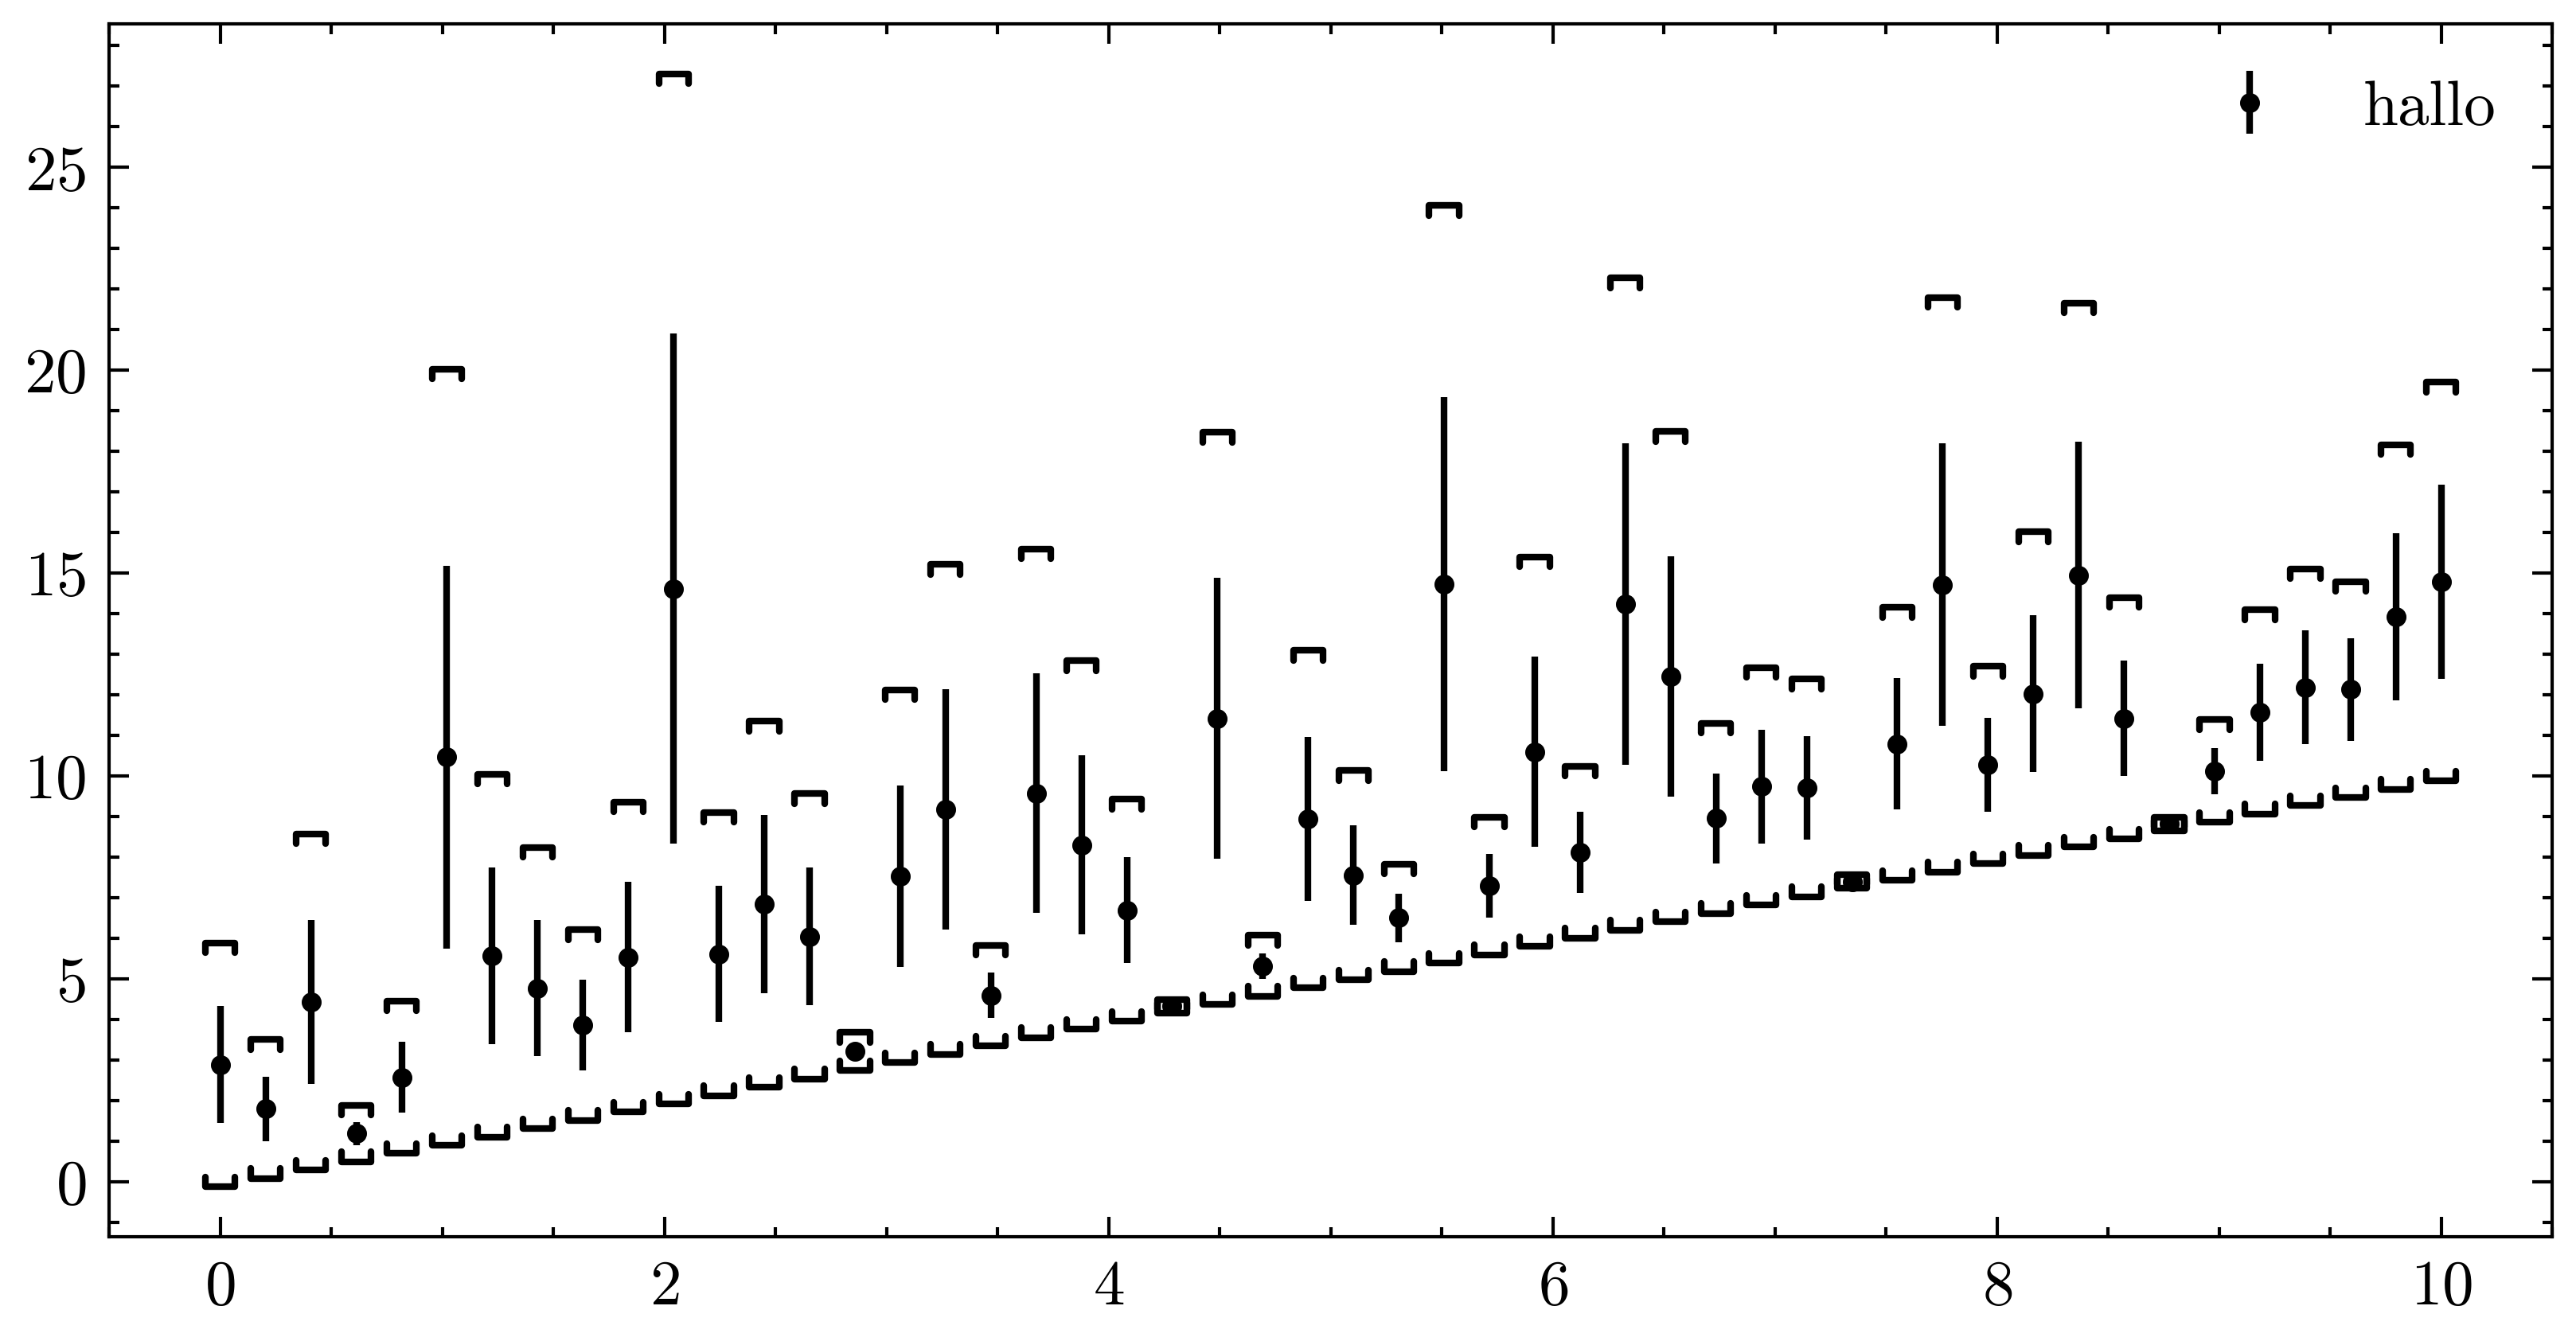

In [ ]:
from utils.binaries import *
from utils.plotting import *

fig, ax = plt.subplots()

dy = np.abs(np.random.normal(scale=5, size=50))
x = np.linspace(0, 10, 50)
y = x + dy

ax.errorbar(x, y, 0.5*dy, fmt='o', label='hallo')
plot_error_markers(ax, x, y, dy, s=20)


ax.legend()

In [3]:
print(test1.__dict__)
print(test2.__dict__)

{'lines': array([ 0. ,  2.5,  5. ,  7.5, 10. ]), 'has_xerr': array([ 4.41331796, 12.33844707,  7.3579145 , -3.68320345,  3.21889007]), 'has_yerr': array([  4.41331796,   9.83844707,   2.3579145 , -11.18320345,
        -6.78110993]), '_callbacks': <matplotlib.cbook.CallbackRegistry object at 0x7f71344921d0>, '_remove_method': <built-in method remove of list object at 0x7f705bdf7040>, '_label': '_container0', 'stale': True}
{'lines': array([ 0. ,  2.5,  5. ,  7.5, 10. ]), 'has_xerr': array([ 4.41331796, 12.33844707,  7.3579145 , -3.68320345,  3.21889007]), 'has_yerr': array([  4.41331796,   9.83844707,   2.3579145 , -11.18320345,
        -6.78110993]), '_callbacks': <matplotlib.cbook.CallbackRegistry object at 0x7f71344921d0>, '_remove_method': <built-in method remove of list object at 0x7f705bdf7040>, '_label': '_container0', 'stale': True}


In [6]:
print(ax.__dict__)

{'_stale': True, 'stale_callback': <function _stale_figure_callback at 0x7f70c017beb0>, '_axes': <Axes: >, 'figure': <Figure size 3960x1980 with 1 Axes>, '_transform': None, '_transformSet': False, '_visible': True, '_animated': False, '_alpha': None, 'clipbox': None, '_clippath': None, '_clipon': True, '_label': '', '_picker': None, '_rasterized': False, '_agg_filter': None, '_mouseover': False, '_callbacks': <matplotlib.cbook.CallbackRegistry object at 0x7f705bbde260>, '_remove_method': <bound method FigureBase.delaxes of <Figure size 3960x1980 with 1 Axes>>, '_url': None, '_gid': None, '_snap': None, '_sketch': None, '_path_effects': [], '_sticky_edges': _XYPair(x=[], y=[]), '_in_layout': True, '_position': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]), '_originalPosition': Bbox([[0.125, 0.10999999999999999], [0.9, 0.88]]), '_aspect': 'auto', '_adjustable': 'box', '_anchor': 'C', '_stale_viewlims': {'x': False, 'y': False}, '_sharex': None, '_sharey': None, 'bbox': <matplotlib.t